In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(42)
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy
import warnings
warnings.filterwarnings('ignore')

# PyMC3 for Bayesian Inference
import pymc3 as pm

In [2]:
#Import both raw data frames into pandas
raw_df = pd.read_csv('Data/Raw/student-mat.csv', delimiter=';')
raw_df2 = pd.read_csv('Data/Raw/student-por.csv', delimiter=';')

In [3]:
#assign all of the dataframes as a variable for easier access
frames = [raw_df,raw_df2]

In [4]:
#combine the dataframes
#same features more instances
df = pd.concat(frames)

In [5]:
#save the merged dataframe as a csv into 
df.to_csv('Data/Processed/combined_raw.csv')

In [6]:
#drop students witch final grade of 0
df = df[~df.G3.isin([0,1])]

Previewing different parts of Data Frame

In [7]:
def overview(df):
    print("First " + str(5) + " rows of the DataFrame\n")
    print(df.head(5))
    print('Last ' +str(5) +' rows of the DataFrame\n')
    print(df.tail(5) )
    print('Number of rows and columns\n')
    print(df.shape)
    print('Index, Datatype and Memory information\n')
    print(df.info()) 
    print('Summary statistics for numerical columns\n')
    print(df.describe()) 
    #print('View unique values and counts')
    #print(s.value_counts(dropna=False)) 
    print('Unique values and counts for all columns\n' )
    print(df.apply(pd.Series.value_counts)) 

In [8]:
overview(df)

First 5 rows of the DataFrame

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Last 5 rows of the DataFrame

    school sex  age address

Descriptive statistics

In [9]:
print('Summary statistics for numerical columns')
print(df.describe())
print('The mean of all columns')
print(df.mean())
print('The correlation between columns in a DataFrame')
print(df.corr()) 
print('The number of non-null values in each DataFrame column')
print(df.count())
print('The highest value in each column')
print(df.max()) 
print('The lowest value in each column')
print(df.min())
print('The median of each column')
print(df.median())
print('The standard deviation of each column')
print(df.std()) 


Summary statistics for numerical columns
              age        Medu       Fedu  traveltime   studytime    failures  \
count  990.000000  990.000000  990.00000  990.000000  990.000000  990.000000   
mean    16.696970    2.619192    2.40202    1.516162    1.977778    0.230303   
std      1.233625    1.126676    1.10060    0.730141    0.833761    0.614528   
min     15.000000    0.000000    0.00000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.00000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.00000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.00000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.00000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  990.000000  990.000000  990.000000  990.000000  990.000000  990.000000   
mean     3.940404    3.196970    3.153535    1.491919    2.290909    3.53535

In [10]:
#drop students witch final grade of 0
df = df[~df.G3.isin([0,1])]

In [11]:
df.shape

(990, 33)

In [12]:
df = df.rename(columns={'G3': 'Grade'})

In [13]:
# https://en.wikipedia.org/wiki/Covariance_matrix
df.cov()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
age,1.521831,-0.165058,-0.167234,0.050403,0.003370,0.218494,0.014278,-0.013053,0.171952,0.158317,0.153966,-0.044888,1.380213,-0.348071,-0.341821,-0.284248
Medu,-0.165058,1.269399,0.790254,-0.201625,0.080508,-0.119490,0.012672,0.000260,0.045382,-0.006619,-0.028642,-0.028485,0.366169,0.727033,0.761527,0.734851
Fedu,-0.167234,0.790254,1.211320,-0.168283,0.020065,-0.128069,0.013872,0.006680,0.040337,-0.009893,0.038643,0.047451,0.228156,0.583581,0.597547,0.547099
traveltime,0.050403,-0.201625,-0.168283,0.533106,-0.048174,0.046830,-0.013697,-0.003692,0.046050,0.074448,0.081239,-0.030906,-0.076672,-0.257034,-0.266239,-0.223816
studytime,0.003370,0.080508,0.020065,-0.048174,0.695158,-0.066667,0.008786,-0.080553,-0.066352,-0.121514,-0.240243,-0.071003,-0.448040,0.486575,0.435277,0.460173
failures,0.218494,-0.119490,-0.128069,0.046830,-0.066667,0.377645,-0.016595,0.062782,0.047517,0.072641,0.085614,0.040384,0.589178,-0.616356,-0.594332,-0.617581
famrel,0.014278,0.012672,0.013872,-0.013697,0.008786,-0.016595,0.854888,0.118929,0.065782,-0.065699,-0.120158,0.156305,-0.401487,0.092753,0.135667,0.152291
freetime,-0.013053,0.000260,0.006680,-0.003692,-0.080553,0.062782,0.118929,1.070365,0.368110,0.136578,0.159022,0.134081,-0.197138,-0.150397,-0.192680,-0.224592
goout,0.171952,0.045382,0.040337,0.046050,-0.066352,0.047517,0.065782,0.368110,1.292884,0.270200,0.590275,-0.012511,0.435927,-0.367763,-0.388469,-0.430595
Dalc,0.158317,-0.006619,-0.009893,0.074448,-0.121514,0.072641,-0.065699,0.136578,0.270200,0.836638,0.741484,0.088254,0.804261,-0.432908,-0.415162,-0.456343


"Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored."-Shubham__Ranjan https://www.geeksforgeeks.org/python-pandas-dataframe-corr/

In [14]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
age,1.000000,-0.118756,-0.123172,0.055958,0.003277,0.288214,0.012518,-0.010227,0.122587,0.140306,0.097033,-0.025421,0.177934,-0.097402,-0.097836,-0.079651
Medu,-0.118756,1.000000,0.637292,-0.245097,0.085703,-0.172580,0.012164,0.000223,0.035425,-0.006423,-0.019765,-0.017663,0.051687,0.222761,0.238655,0.225464
Fedu,-0.123172,0.637292,1.000000,-0.209414,0.021866,-0.189354,0.013632,0.005866,0.032232,-0.009827,0.027297,0.030121,0.032968,0.183044,0.191702,0.171836
traveltime,0.055958,-0.245097,-0.209414,1.000000,-0.079135,0.104371,-0.020289,-0.004888,0.055468,0.111475,0.086504,-0.029572,-0.016700,-0.121526,-0.128750,-0.105965
studytime,0.003277,0.085703,0.021866,-0.079135,1.000000,-0.130114,0.011397,-0.093384,-0.069990,-0.159337,-0.224020,-0.059496,-0.085461,0.201461,0.184335,0.190791
failures,0.288214,-0.172580,-0.189354,0.104371,-0.130114,1.000000,-0.029206,0.098747,0.068002,0.129233,0.108314,0.045911,0.152476,-0.346237,-0.341485,-0.347400
famrel,0.012518,0.012164,0.013632,-0.020289,0.011397,-0.029206,1.000000,0.124328,0.062571,-0.077685,-0.101036,0.118105,-0.069058,0.034630,0.051809,0.056938
freetime,-0.010227,0.000223,0.005866,-0.004888,-0.093384,0.098747,0.124328,1.000000,0.312919,0.144327,0.119500,0.090542,-0.030304,-0.050183,-0.065759,-0.075042
goout,0.122587,0.035425,0.032232,0.055468,-0.069990,0.068002,0.062571,0.312919,1.000000,0.259799,0.403601,-0.007687,0.060972,-0.111653,-0.120632,-0.130908
Dalc,0.140306,-0.006423,-0.009827,0.111475,-0.159337,0.129233,-0.077685,0.144327,0.259799,1.000000,0.630246,0.067408,0.139837,-0.163385,-0.160263,-0.172465


In [15]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [16]:
groupby_grades =df.groupby('Grade').agg(np.mean)

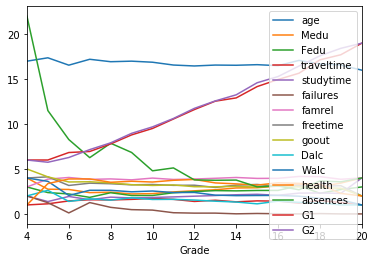

In [17]:
groupby_grades.plot()
plt.savefig('AllFeatures.png');

In [18]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'Grade'],
      dtype='object')

# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
- 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- 2 sex - student's sex (binary: 'F' - female or 'M' - male)
- 3 age - student's age (numeric: from 15 to 22)
- 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
- 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- 16 schoolsup - extra educational support (binary: yes or no)
- 17 famsup - family educational support (binary: yes or no)
- 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- 19 activities - extra-curricular activities (binary: yes or no)
- 20 nursery - attended nursery school (binary: yes or no)
- 21 higher - wants to take higher education (binary: yes or no)
- 22 internet - Internet access at home (binary: yes or no)
- 23 romantic - with a romantic relationship (binary: yes or no)
- 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
- 30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
- 31 G1 - first period grade (numeric: from 0 to 20)
- 31 G2 - second period grade (numeric: from 0 to 20)
- 32 G3 - final grade (numeric: from 0 to 20, output target)

In [19]:
# Correlations of numerical values to final grade (target variable)
df.corr()['Grade'].sort_values()

failures     -0.347400
absences     -0.222513
Walc         -0.184069
Dalc         -0.172465
goout        -0.130908
traveltime   -0.105965
health       -0.090250
age          -0.079651
freetime     -0.075042
famrel        0.056938
Fedu          0.171836
studytime     0.190791
Medu          0.225464
G1            0.880554
G2            0.952330
Grade         1.000000
Name: Grade, dtype: float64

In [20]:
df_corr = df.drop(['G1','G2'],1)

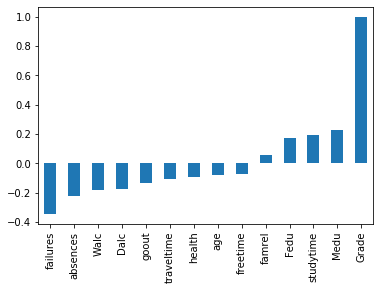

In [24]:
# Correlations of numerical values to final grade (target variable)
df_corr.corr()['Grade'].sort_values().plot(kind='bar');

In [25]:
df_corr.corr()['Grade'].sort_values()

failures     -0.347400
absences     -0.222513
Walc         -0.184069
Dalc         -0.172465
goout        -0.130908
traveltime   -0.105965
health       -0.090250
age          -0.079651
freetime     -0.075042
famrel        0.056938
Fedu          0.171836
studytime     0.190791
Medu          0.225464
Grade         1.000000
Name: Grade, dtype: float64

In [26]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
Grade          int64
dtype: object

In [22]:
categorical_data = df.select_dtypes(include='object').copy()

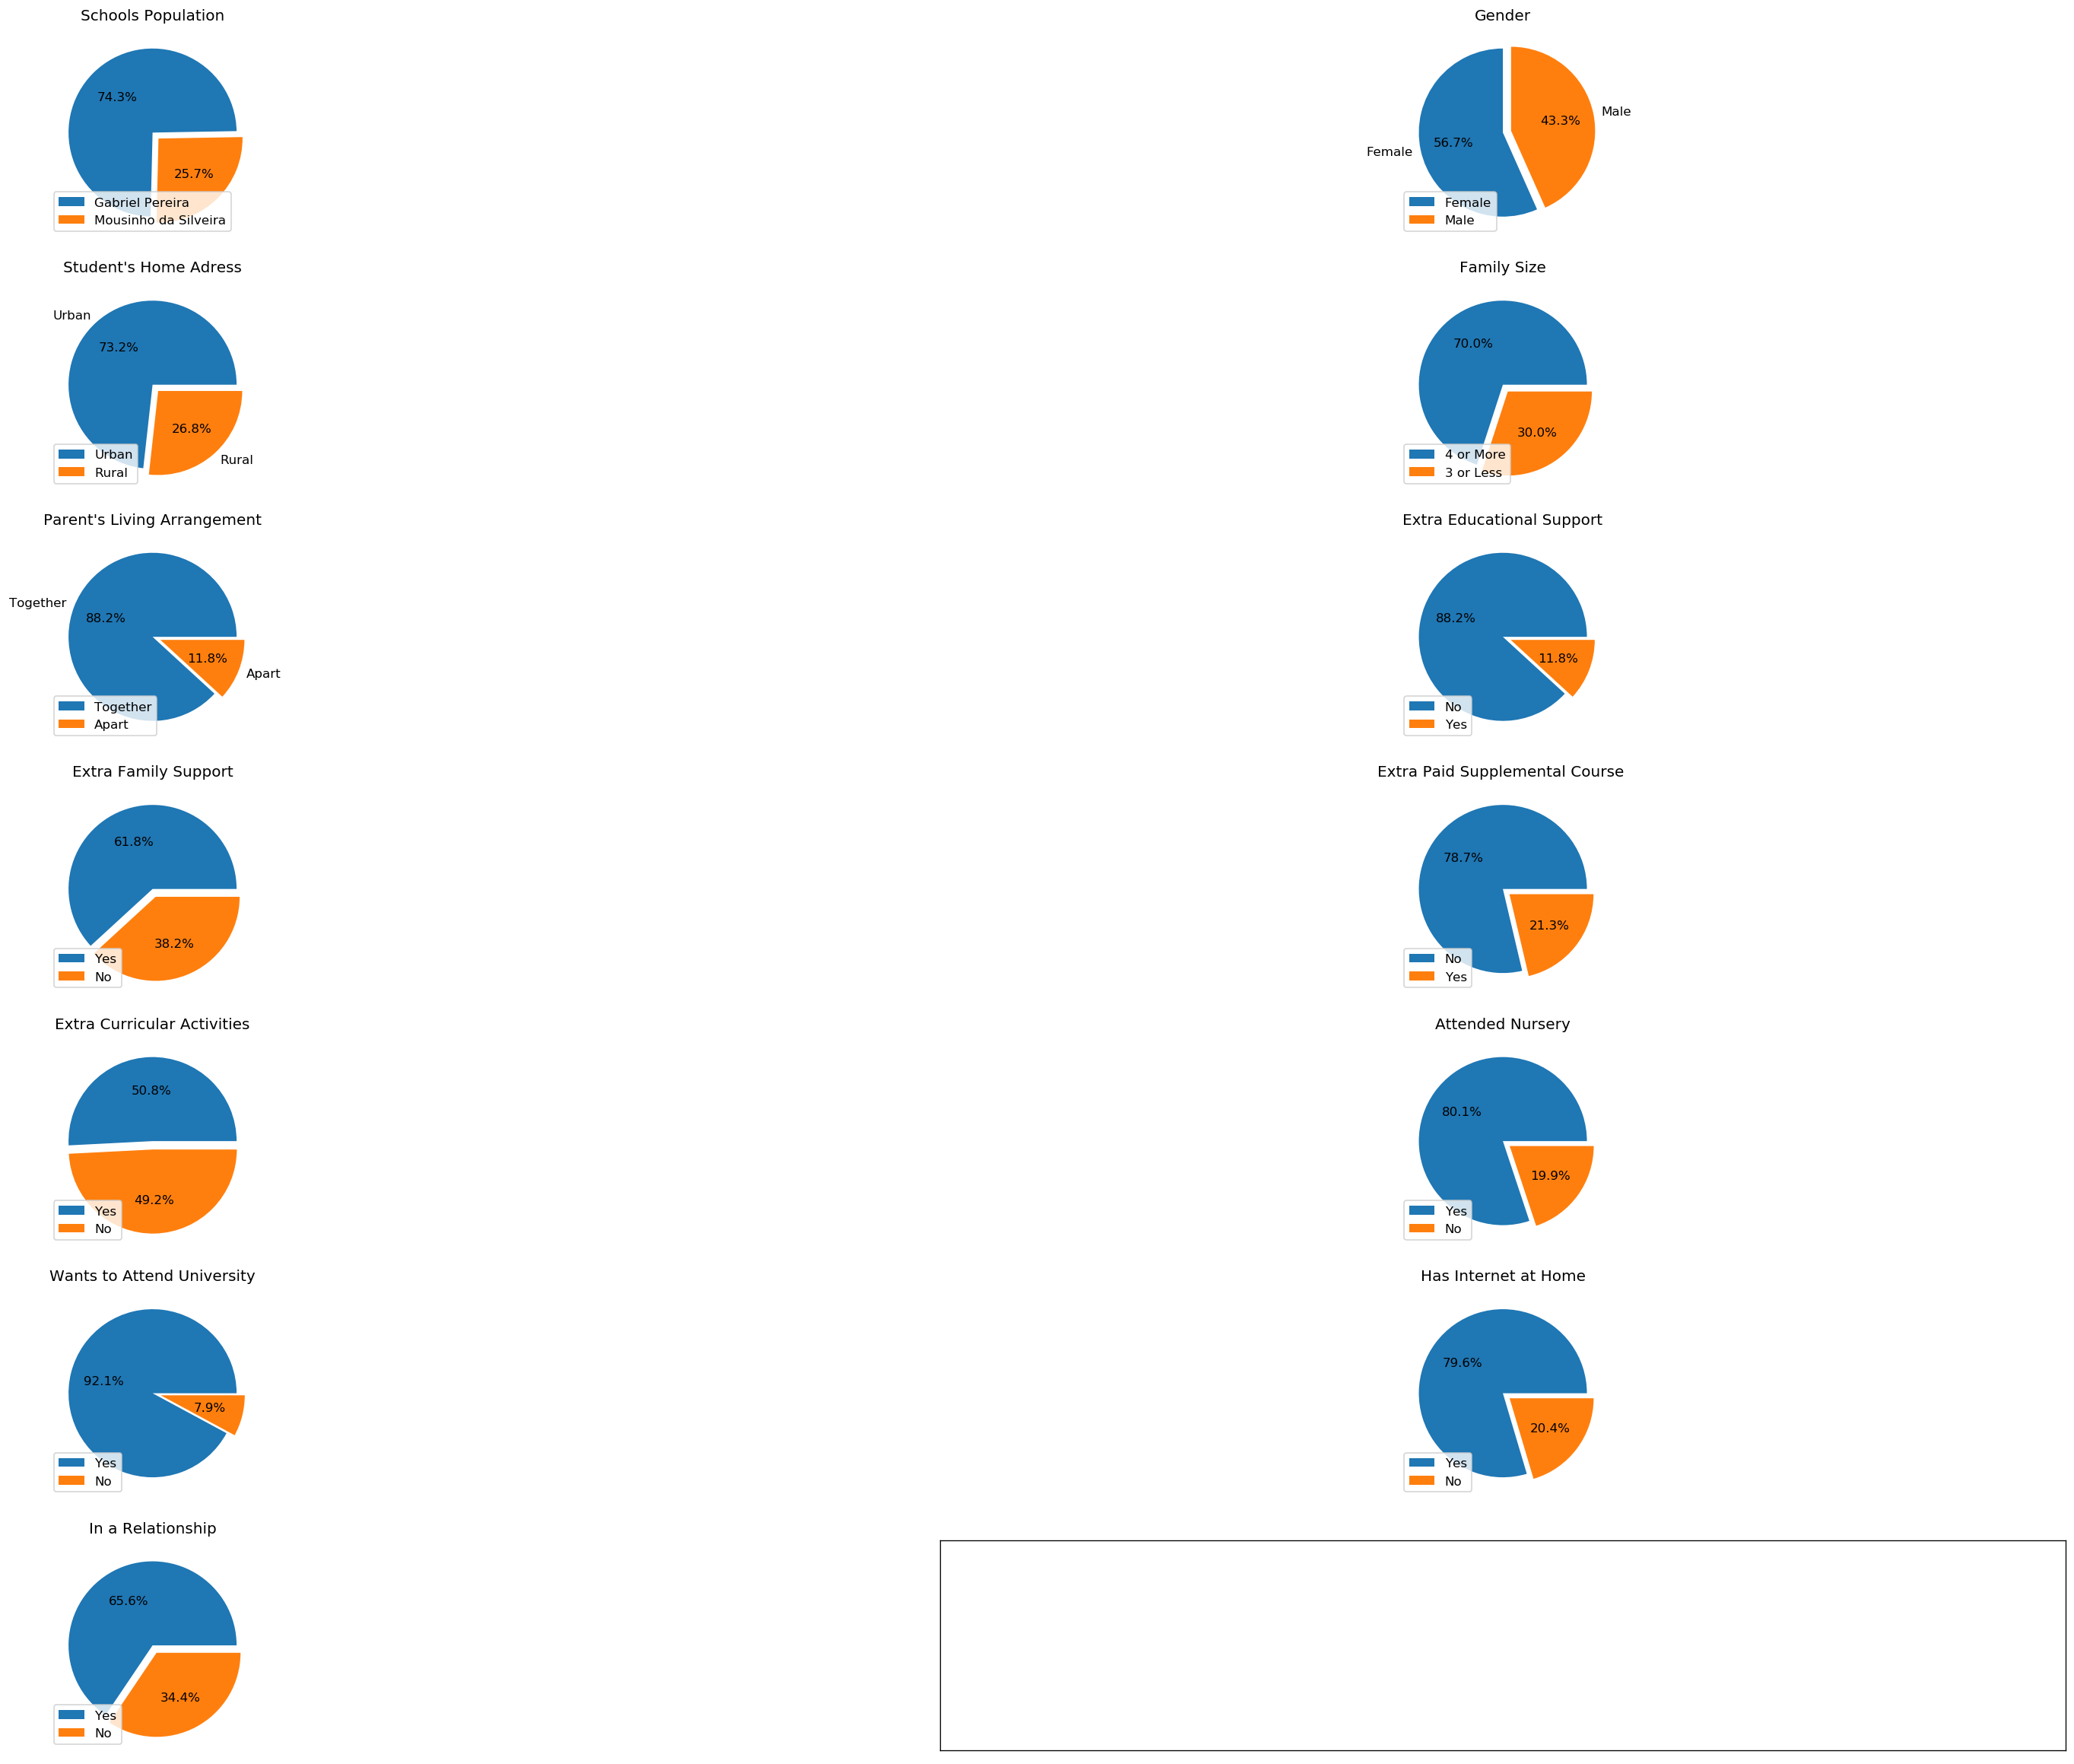

In [27]:
# Create Figure and Subplots
fig, axs = plt.subplots(7 , 2, figsize=(35,25), sharex=True, sharey=True, dpi=120)
# Plots
axs[0,0].pie(df.school.value_counts(normalize=True),autopct='%1.1f%%', explode = (0,0.1), startangle=1)  
axs[0,0].set_title('Schools Population')
axs[0,0].legend(['Gabriel Pereira','Mousinho da Silveira'],loc=3,)


axs[0,1].pie(df.sex.value_counts(), autopct='%1.1f%%', explode = (0,0.1), labels=('Female','Male'),startangle=90) 
axs[0,1].set_title('Gender')
axs[0,1].legend(['Female', 'Male'], loc=3)

axs[1,0].pie(df.address.value_counts(), autopct='%1.1f%%', labels=('Urban', 'Rural'),explode = (0,0.1))
axs[1,0].set_title("Student's Home Adress")
axs[1,0].legend(['Urban','Rural'],loc=3)


axs[1,1].pie(df.famsize.value_counts(), autopct= '%1.1f%%',explode = (0,0.1))
axs[1,1].set_title("Family Size")
axs[1,1].legend(['4 or More','3 or Less'],loc=3)

axs[2,0].pie(df.Pstatus.value_counts(), autopct='%1.1f%%', labels=('Together', 'Apart'),explode = (0,0.1))
axs[2,0].set_title("Parent's Living Arrangement")
axs[2,0].legend(['Together','Apart'],loc=3)

axs[2,1].pie(df.schoolsup.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[2,1].set_title("Extra Educational Support")
axs[2,1].legend(['No', 'Yes'],loc=3)

axs[3,0].pie(df.famsup.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[3,0].set_title("Extra Family Support")
axs[3,0].legend(['Yes', 'No'],loc=3)

axs[3,1].pie(df.paid.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[3,1].set_title("Extra Paid Supplemental Course ")
axs[3,1].legend(['No', 'Yes',],loc=3)

axs[4,0].pie(df.activities.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[4,0].set_title("Extra Curricular Activities")
axs[4,0].legend(['Yes', 'No'],loc=3)

axs[4,1].pie(df.nursery.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[4,1].set_title("Attended Nursery")
axs[4,1].legend(['Yes', 'No',],loc=3)


axs[5,0].pie(df.higher.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[5,0].set_title("Wants to Attend University")
axs[5,0].legend(['Yes', 'No'],loc=3)

axs[5,1].pie(df.internet.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[5,1].set_title("Has Internet at Home")
axs[5,1].legend(['Yes', 'No',],loc=3)

axs[6,0].pie(df.romantic.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[6,0].set_title("In a Relationship")
axs[6,0].legend(['Yes', 'No'],loc=3)
# ax2.yaxis.set_ticks_position('none') 
#plt.tight_layout()
plt.show()

We can see that some binary categories are extremely inbalanced.  The most lopsided binary feature, 'higher', should be dropped.

In [28]:
df.drop(['higher'], axis=1, inplace=True)

In [29]:
df.schoolsup.value_counts()

no     873
yes    117
Name: schoolsup, dtype: int64

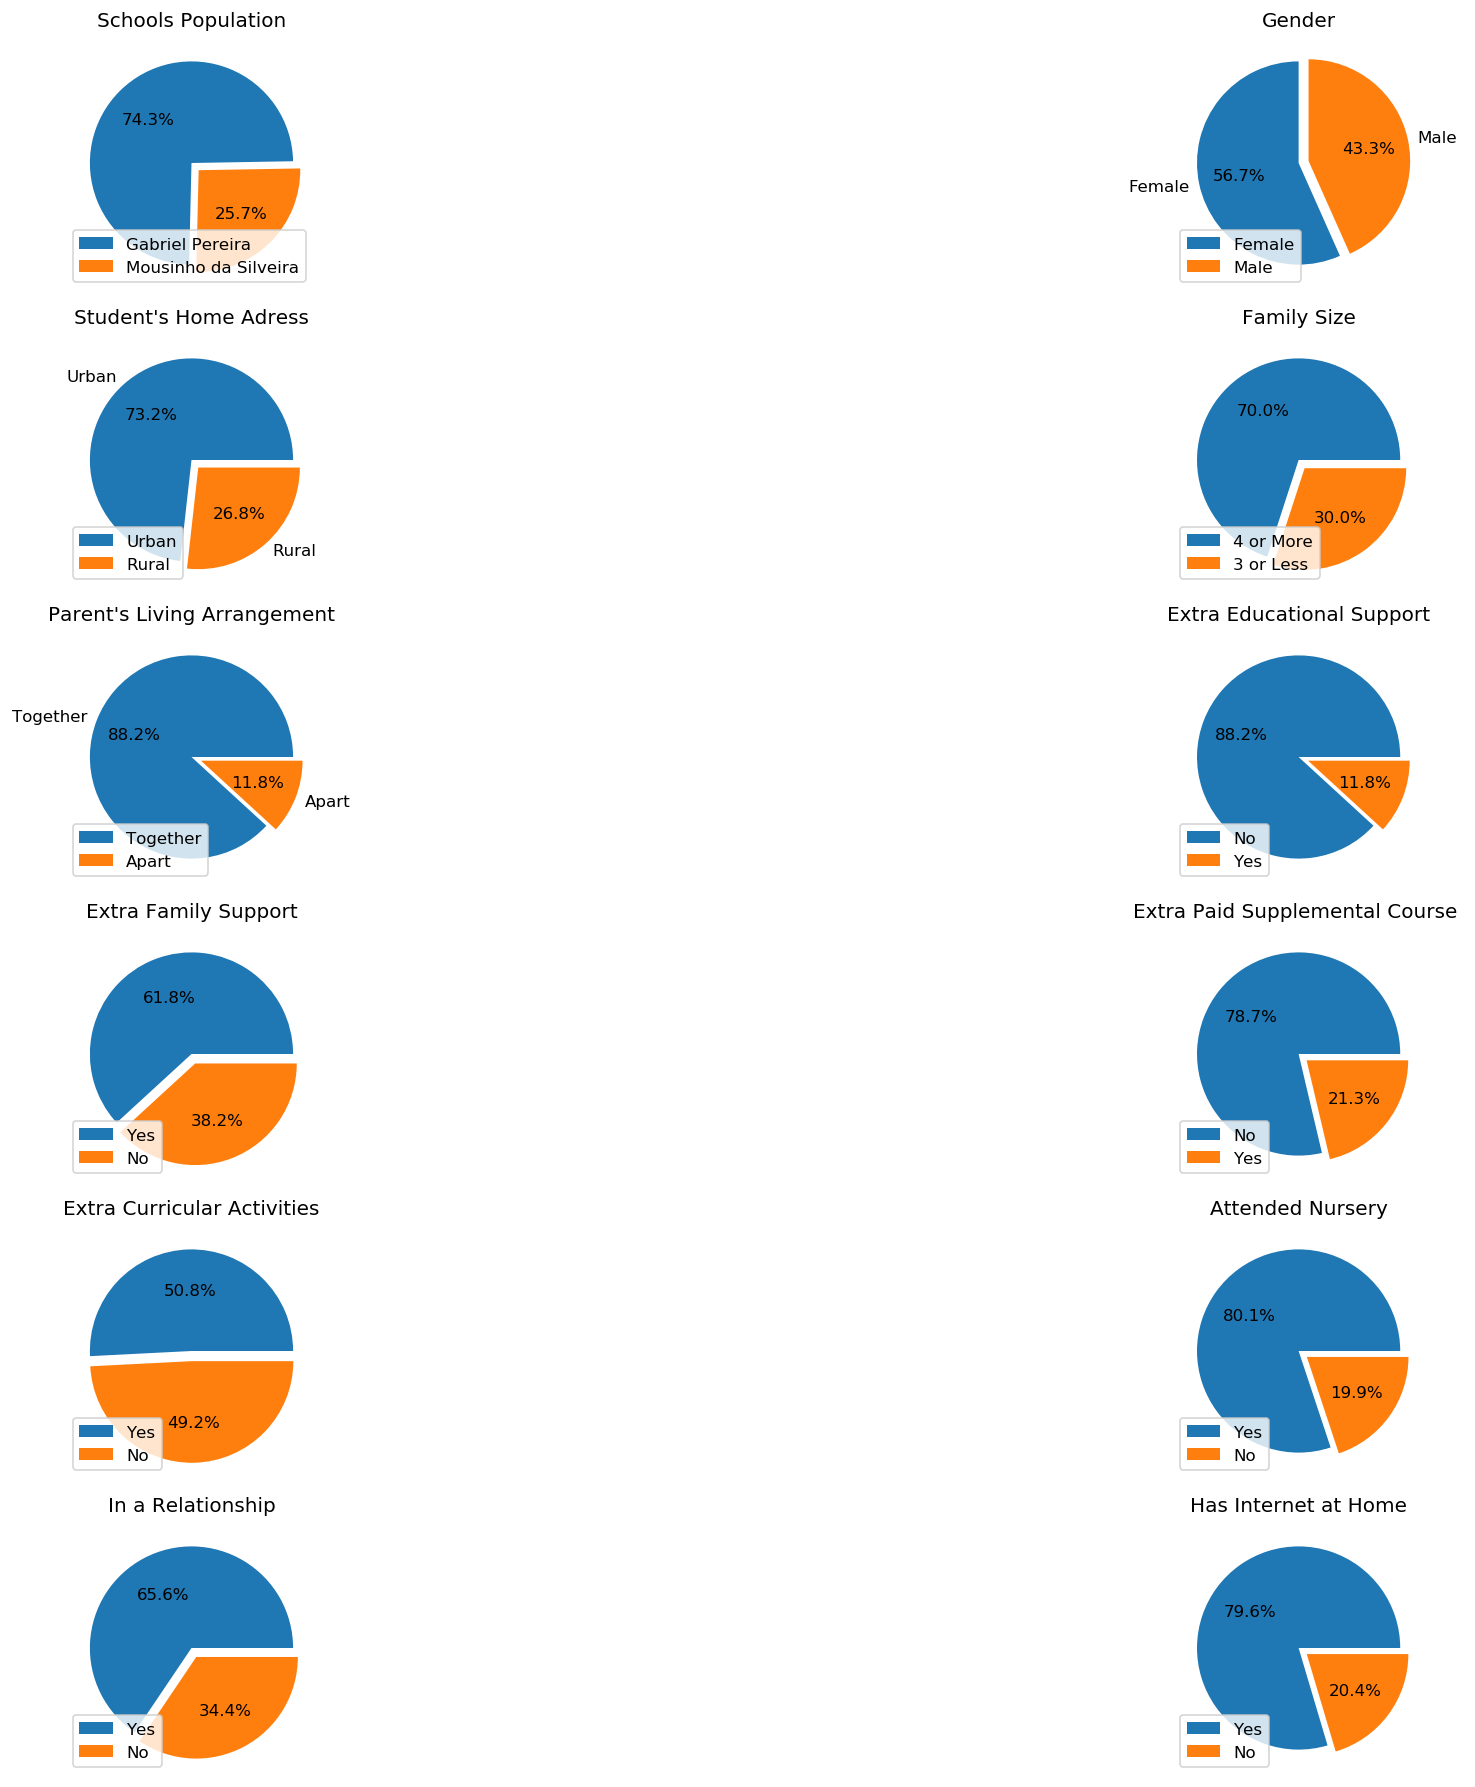

In [30]:
# Create Figure and Subplots
fig, axs = plt.subplots(6 , 2, figsize=(25,15), sharex=True, sharey=True, dpi=120)#, figsize=(25,10), sharey=True, dpi=120

# Plots
axs[0,0].pie(df.school.value_counts(normalize=True),autopct='%1.1f%%', explode = (0,0.1), startangle=1)  
axs[0,0].set_title('Schools Population')
axs[0,0].legend(['Gabriel Pereira','Mousinho da Silveira'],loc=3,)

axs[0,1].pie(df.sex.value_counts(), autopct='%1.1f%%', explode = (0,0.1), labels=('Female','Male'),startangle=90) 
axs[0,1].set_title('Gender')
axs[0,1].legend(['Female', 'Male'], loc=3)

axs[1,0].pie(df.address.value_counts(), autopct='%1.1f%%', labels=('Urban', 'Rural'),explode = (0,0.1))
axs[1,0].set_title("Student's Home Adress")
axs[1,0].legend(['Urban','Rural'],loc=3)


axs[1,1].pie(df.famsize.value_counts(), autopct= '%1.1f%%',explode = (0,0.1))
axs[1,1].set_title("Family Size")
axs[1,1].legend(['4 or More','3 or Less'],loc=3)

axs[2,0].pie(df.Pstatus.value_counts(), autopct='%1.1f%%', labels=('Together', 'Apart'),explode = (0,0.1))
axs[2,0].set_title("Parent's Living Arrangement")
axs[2,0].legend(['Together','Apart'],loc=3)

axs[2,1].pie(df.schoolsup.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[2,1].set_title("Extra Educational Support")
axs[2,1].legend(['No', 'Yes'],loc=3)

axs[3,0].pie(df.famsup.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[3,0].set_title("Extra Family Support")
axs[3,0].legend(['Yes', 'No'],loc=3)

axs[3,1].pie(df.paid.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[3,1].set_title("Extra Paid Supplemental Course ")
axs[3,1].legend(['No', 'Yes',],loc=3)

axs[4,0].pie(df.activities.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[4,0].set_title("Extra Curricular Activities")
axs[4,0].legend(['Yes', 'No'],loc=3)

axs[4,1].pie(df.nursery.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[4,1].set_title("Attended Nursery")
axs[4,1].legend(['Yes', 'No',],loc=3)


axs[5,0].pie(df.romantic.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[5,0].set_title("In a Relationship")
axs[5,0].legend(['Yes', 'No'],loc=3)

axs[5,1].pie(df.internet.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[5,1].set_title("Has Internet at Home")
axs[5,1].legend(['Yes', 'No',],loc=3)

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.savefig('Distribution_of_Features.png')
plt.show()

In [31]:
grades = np.sort(df['Grade'].value_counts())

In [32]:
import matplotlib.style as style
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

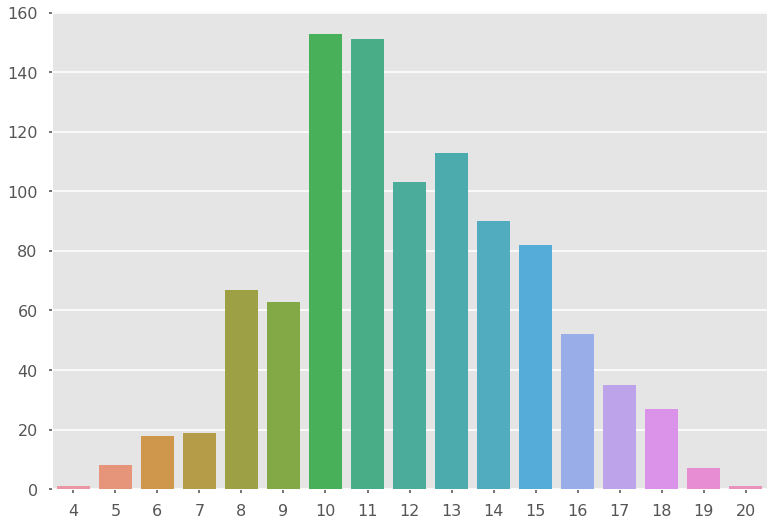

In [33]:
sns.barplot(df['Grade'].value_counts().index, 
        df['Grade'].value_counts().values)
plt.savefig('Distribution_of_Grades.png');


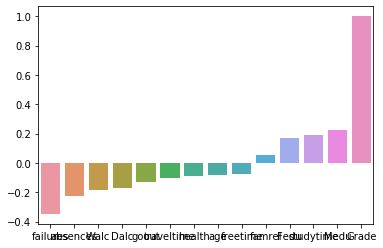

In [38]:
ax = sns.barplot(df_corr.corr()['Grade'].sort_values().index, 
        df_corr.corr()['Grade'].sort_values().values)

plt.savefig('Corr.png');

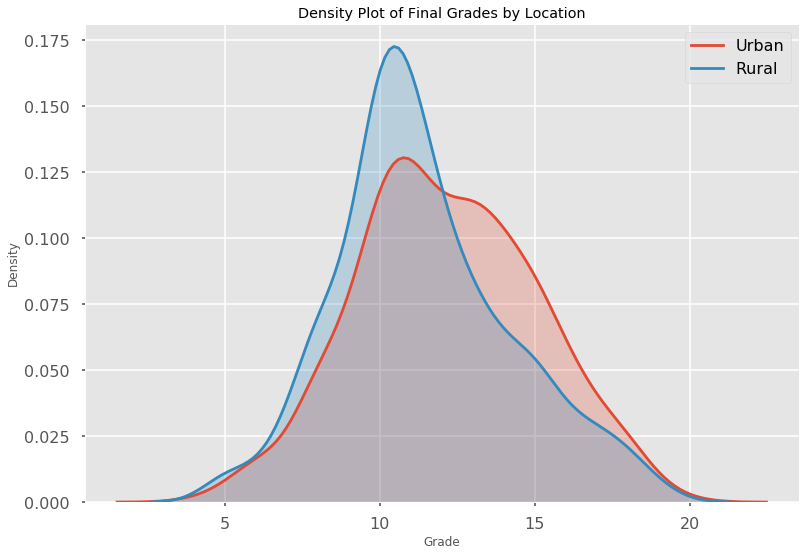

In [35]:
# Grade distribution by address
sns.kdeplot(df.ix[df['address'] == 'U', 'Grade'], label = 'Urban', shade = True)
sns.kdeplot(df.ix[df['address'] == 'R', 'Grade'], label = 'Rural', shade = True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Location');

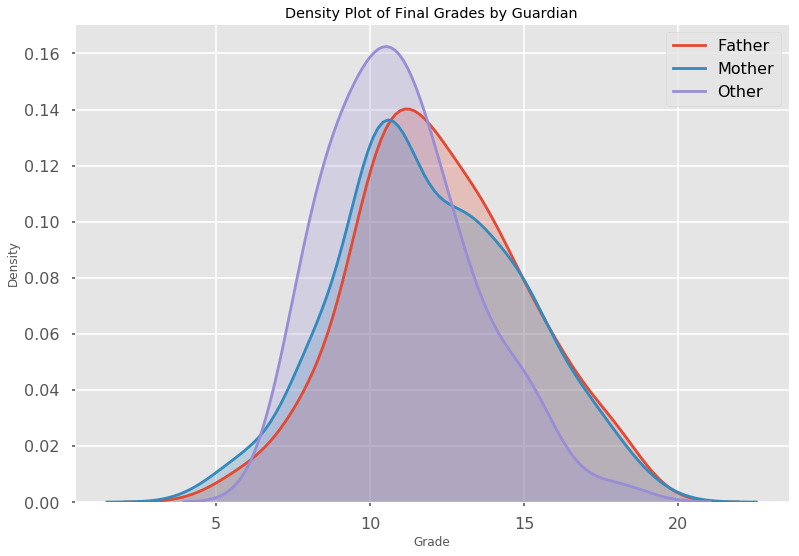

In [36]:
# Grade distribution by Guardian
sns.kdeplot(df.ix[df['guardian'] == 'father', 'Grade'], label = 'Father', shade = True)
sns.kdeplot(df.ix[df['guardian'] == 'mother', 'Grade'], label = 'Mother', shade = True)
sns.kdeplot(df.ix[df['guardian'] == 'other', 'Grade'], label = 'Other', shade = True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Guardian');

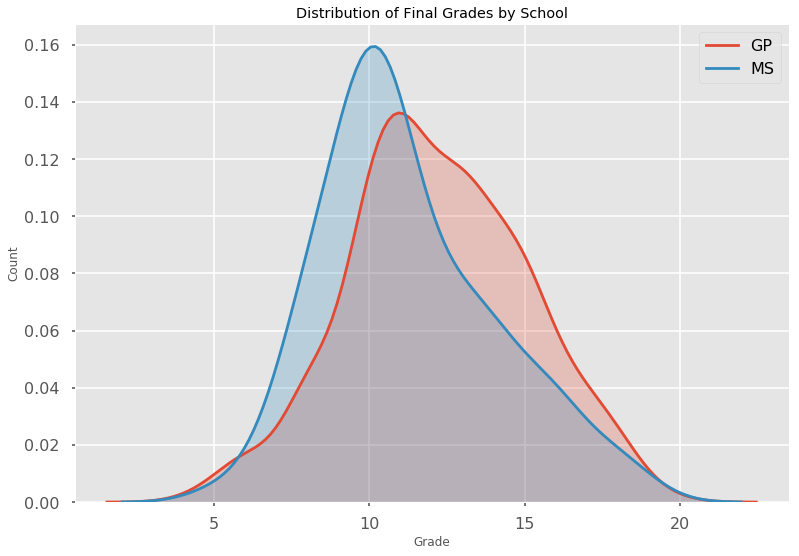

In [37]:
# Grade distribution by school
sns.kdeplot(df.ix[df['school'] == 'GP', 'Grade'], label = 'GP', shade = True)
sns.kdeplot(df.ix[df['school'] == 'MS', 'Grade'], label = 'MS', shade = True)
plt.xlabel('Grade'); plt.ylabel('Count'); plt.title('Distribution of Final Grades by School');

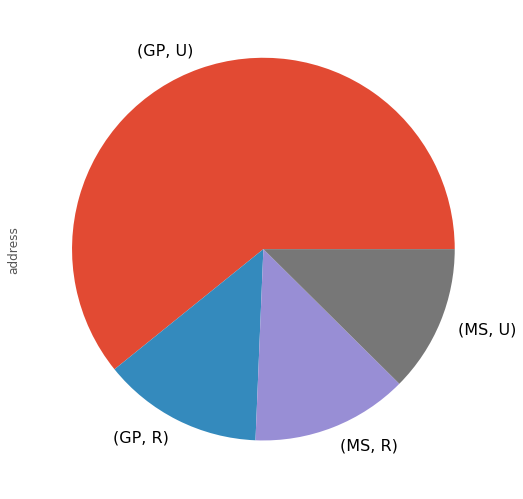

In [38]:
# Look at distribution of schools by address
schools = df.groupby(['school'])['address'].value_counts()
schools.plot(kind='pie');

In [39]:
# Calculate percentile for grades
df['percentile'] = df['Grade'].apply(lambda x: percentileofscore(df['Grade'], x))

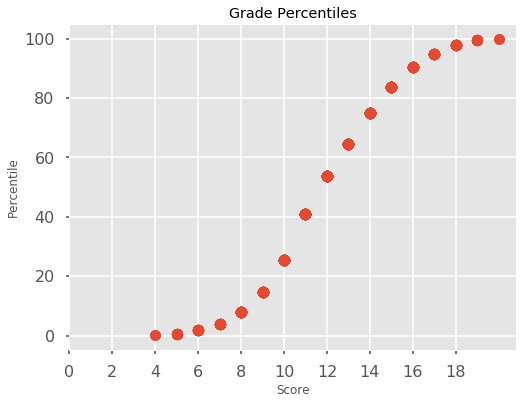

In [41]:
# Plot percentiles for grades
plt.figure(figsize = (8, 6))
plt.plot(df['Grade'], df['percentile'], 'o')
plt.xticks(range(0, 20, 2), range(0, 20, 2))
plt.xlabel('Score'); plt.ylabel('Percentile'); plt.title('Grade Percentiles')
plt.savefig('Grade_Percentiles.png');

In [42]:
print('50th percentile score:', np.min(df.loc[df['percentile'] > 50, 'Grade']))
print('Minimum Score needed for 90th percentile:', np.min(df.loc[df['percentile'] > 90, 'Grade']))

50th percentile score: 12
Minimum Score needed for 90th percentile: 16


In [43]:
# Correlations of numerical values to final grade (target variable)
df.corr()['Grade'].sort_values()

failures     -0.347400
absences     -0.222513
Walc         -0.184069
Dalc         -0.172465
goout        -0.130908
traveltime   -0.105965
health       -0.090250
age          -0.079651
freetime     -0.075042
famrel        0.056938
Fedu          0.171836
studytime     0.190791
Medu          0.225464
G1            0.880554
G2            0.952330
percentile    0.983028
Grade         1.000000
Name: Grade, dtype: float64

In [44]:
# Select only categorical variables
category_df = df.select_dtypes('object')
# One hot encode the variables
dummy_df = pd.get_dummies(category_df, drop_first=True)
# Put the grade back in the dataframe
dummy_df['Grade'] = df['Grade']
dummy_df.head()

,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,internet_yes,romantic_yes,Grade
0,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,0,6
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,6
2,0,0,1,1,1,0,0,0,0,0,...,1,0,1,0,1,0,1,1,0,10
3,0,0,1,0,1,1,0,0,0,0,...,1,0,0,1,1,1,1,1,1,15
4,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,10


In [45]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['Grade'].sort_values()

schoolsup_yes       -0.163703
school_MS           -0.142174
paid_yes            -0.093390
guardian_other      -0.089417
Mjob_other          -0.073283
reason_other        -0.055022
romantic_yes        -0.045010
Fjob_other          -0.043343
sex_M               -0.039950
Fjob_services       -0.032672
famsup_yes          -0.025364
Pstatus_T           -0.013773
guardian_mother     -0.000792
Fjob_health          0.013425
reason_home          0.021770
famsize_LE3          0.023633
Mjob_services        0.039977
nursery_yes          0.043787
activities_yes       0.067557
Mjob_health          0.106690
Mjob_teacher         0.109775
internet_yes         0.112554
address_U            0.117011
reason_reputation    0.122847
Fjob_teacher         0.154678
Grade                1.000000
Name: Grade, dtype: float64

In [46]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc',
       'health', 'absences', 'G1', 'G2', 'Grade', 'percentile'],
      dtype='object')

In [47]:
# Takes in a dataframe, finds the most correlated variables with the
# grade and returns training and testing datasets
def format_data(df):
    # Targets are final grade of student
    labels = df['Grade']
    
    # Drop the school and the grades from features
    df = df.drop(columns=['school', 'G1', 'G2', 'percentile'])
    
    # One-Hot Encoding of Categorical Variables
    df = pd.get_dummies(df, drop_first=True)
    
    # Find correlations with the Grade
    most_correlated = df.corr().abs()['Grade'].sort_values(ascending=False)
    
    # Maintain the top 6 most correlation features with Grade
    most_correlated = most_correlated[:7]
    
    df = df.ix[:, most_correlated.index]
#    df = df.drop(columns = 'higher_no')
    
    # Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                        test_size = 0.25,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test

In [48]:
X_train, X_test, y_train, y_test = format_data(df)
X_train.sample(5)

,Grade,failures,Medu,absences,studytime,Walc,Dalc
481,11,0,2,2,1,1,1
591,14,0,2,2,2,1,1
38,11,0,3,2,3,1,1
191,10,0,3,4,2,4,1
385,10,0,2,2,2,1,1


In [49]:
# Rename variables in train and test
X_train = X_train.rename(columns={'Medu': 'mother_edu',
                                  'Fedu': 'father_edu'})

X_test = X_test.rename(columns={'Medu': 'mother_edu',
                                'Fedu': 'father_edu'})


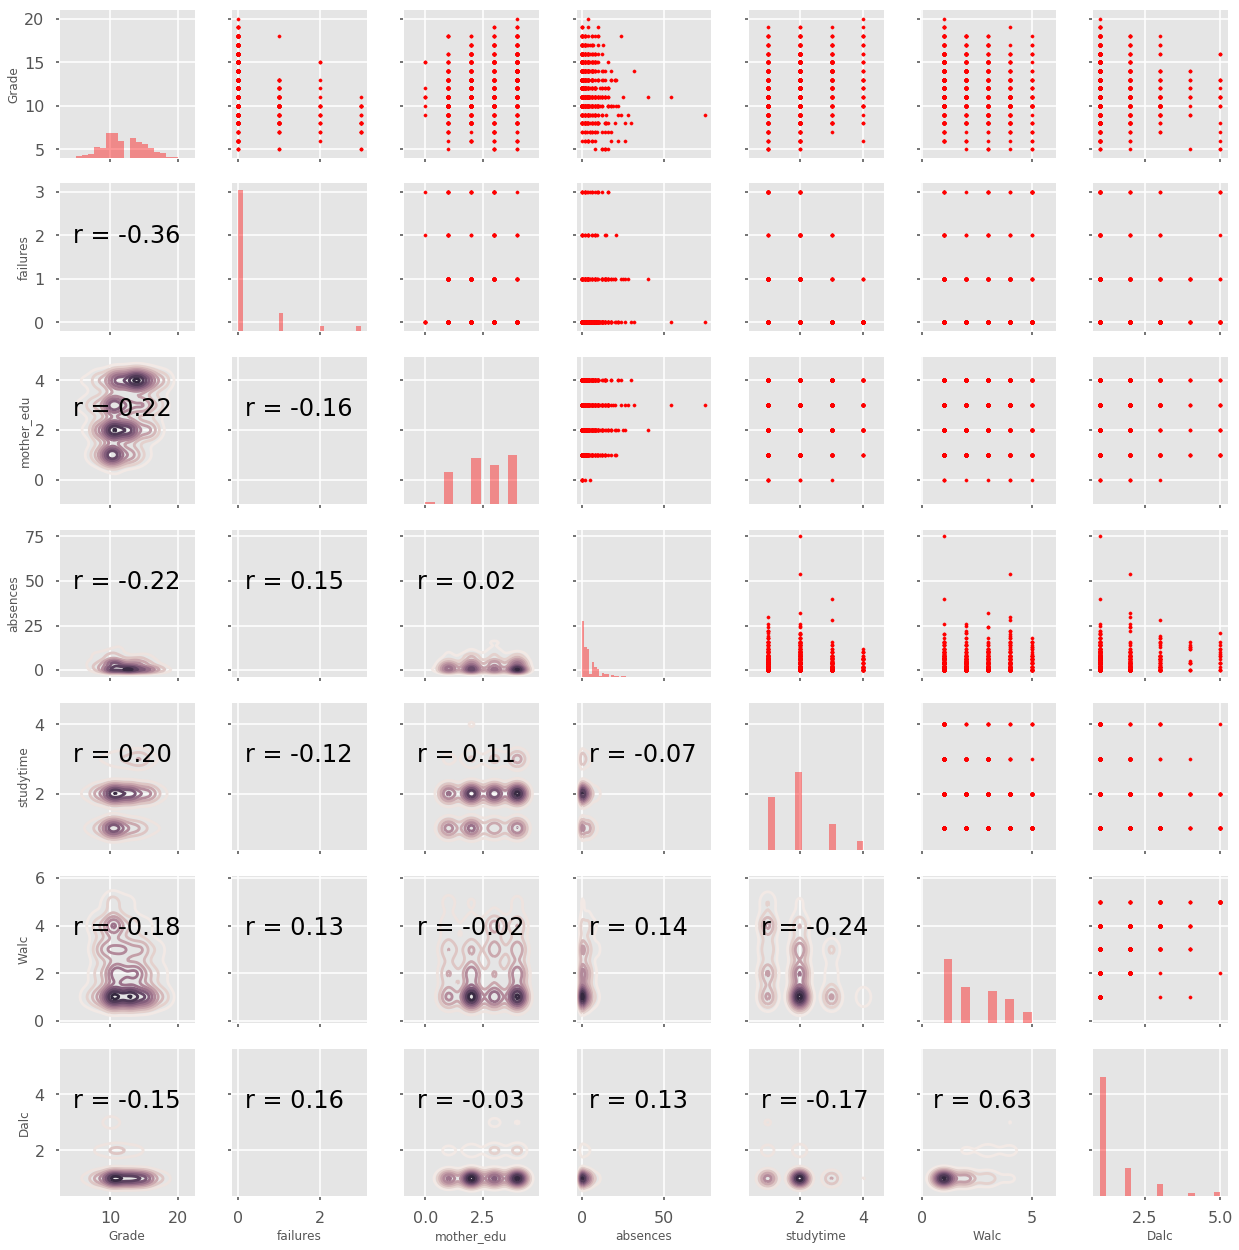

In [50]:
# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(X_train)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc)
plt.savefig('Pair_chart.png');


In [51]:

# Create relation to the median grade column
X_plot = X_train.copy()
X_plot['relation_median'] = (X_plot['Grade'] >= 12)
X_plot['relation_median'] = X_plot['relation_median'].replace({True: 'above', False: 'below'})
X_plot = X_plot.drop(columns='Grade')

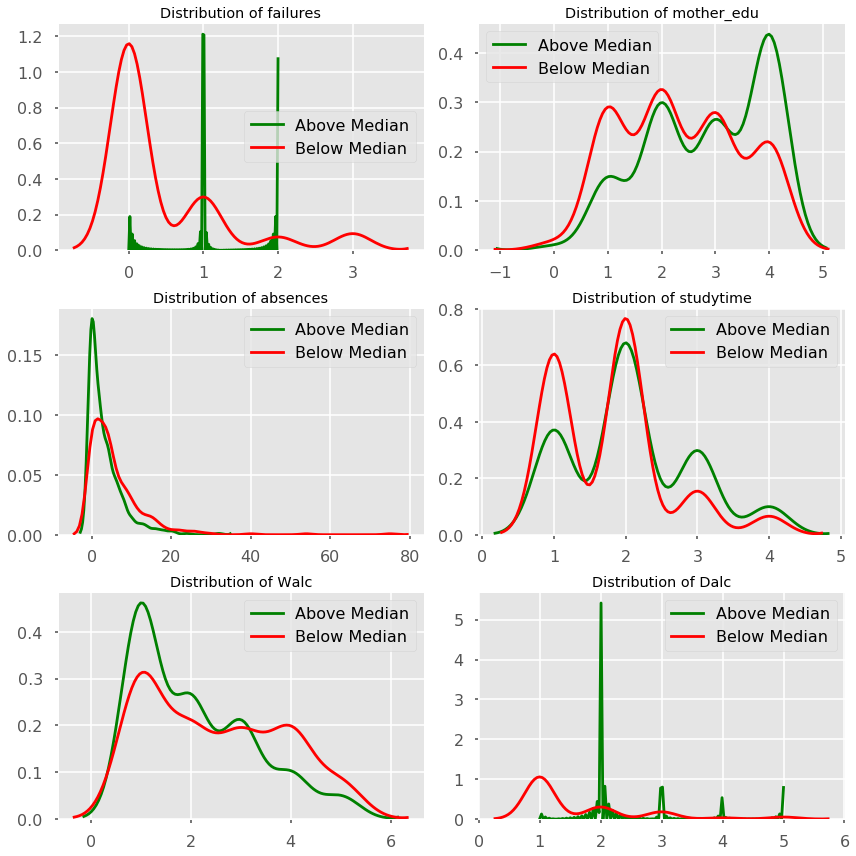

In [52]:
plt.figure(figsize=(12, 12))
# Plot the distribution of each variable colored
# by the relation to the median grade
for i, col in enumerate(X_plot.columns[:-1]):
    plt.subplot(3, 2, i + 1)
    subset_above = X_plot[X_plot['relation_median'] == 'above']
    subset_below = X_plot[X_plot['relation_median'] == 'below']
    sns.kdeplot(subset_above[col], label = 'Above Median', color = 'green')
    sns.kdeplot(subset_below[col], label = 'Below Median', color = 'red')
    plt.legend(); plt.title('Distribution of %s' % col)
plt.savefig('Bayesian1.png')    
plt.tight_layout()

In [53]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

Establish Naive Baseline

In [54]:
# Naive baseline is the median
median_pred = X_train['Grade'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['Grade']

In [55]:


# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))



Median Baseline  MAE: 2.2984
Median Baseline RMSE: 2.8554


Standard Machine Learning Models

In [56]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='Grade')
    X_test = X_test.drop(columns='Grade')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.ix[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.ix['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [57]:
results = evaluate(X_train, X_test, y_train, y_test)

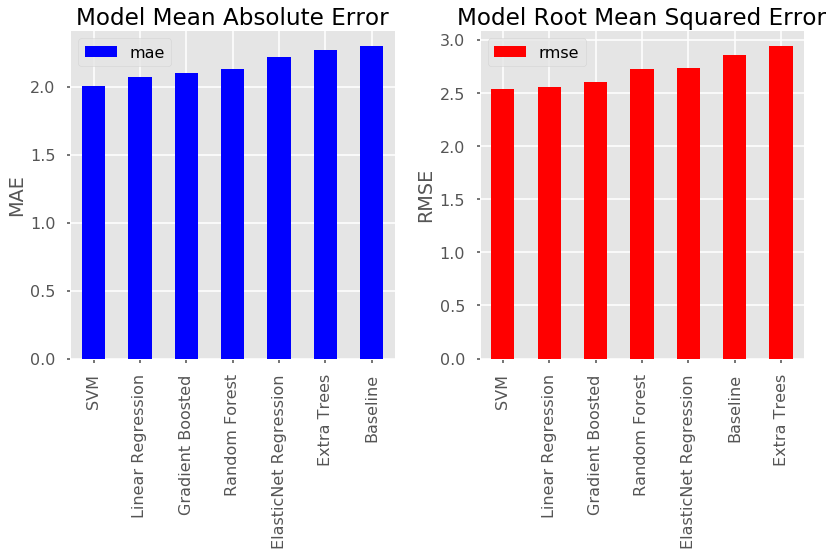

In [58]:
figsize(12, 8)
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');
plt.savefig('ML.png')
plt.tight_layout()

In [59]:
results

,mae,rmse
Linear Regression,2.07296,2.55469
ElasticNet Regression,2.21774,2.72956
Random Forest,2.12625,2.72638
Extra Trees,2.27197,2.94031
SVM,2.0031,2.54028
Gradient Boosted,2.10341,2.59888
Baseline,2.29839,2.85539


In [60]:
print('The Support Vector Machine is {:0.2f}% better than the baseline.'.format(
    (100 * abs(results.loc['SVM', 'mae'] - results.loc['Baseline', 'mae'])) / results.loc['Baseline', 'mae']))

The Support Vector Machine is 12.85% better than the baseline.


In [61]:
#Fomula from Ordianry Least Squares Linrear Regression
lr = LinearRegression()
lr.fit(X_train.drop(columns='Grade'), y_train)

ols_formula = 'Grade = %0.2f +' % lr.intercept_
for i, col in enumerate(X_train.columns[1:]):
    ols_formula += ' %0.2f * %s +' % (lr.coef_[i], col)
    
' '.join(ols_formula.split(' ')[:-1])


'Grade = 11.25 + -1.28 * failures + 0.42 * mother_edu + -0.08 * absences + 0.41 * studytime + -0.18 * Walc + -0.04 * Dalc'

In [62]:
# implementing Baysian Statistics (Linear Regression)


# Formula for Bayesian Linear Regression (follows R formula syntax
formula = 'Grade ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'Grade ~ failures + mother_edu + absences + studytime + Walc + Dalc'

In [63]:
# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, Dalc, Walc, studytime, absences, mother_edu, failures, Intercept]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:26<00:00, 223.82draws/s]


In [64]:


# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace, figsize=(14, len(trace.varnames)*1.8),
                      lines={k: v['mean'] for k, v in pm.summary(trace).iterrows()})
    
    matplotlib.rcParams['font.size'] = 16
    
    # Labels with the median value
    for i, mn in enumerate(pm.summary(trace)['mean']):
        ax[i, 0].annotate('{:0.2f}'.format(mn), xy = (mn, 0), xycoords = 'data', size = 8,
                          xytext = (-18, 18), textcoords = 'offset points', rotation = 90,
                          va = 'bottom', fontsize = 'large', color = 'red')



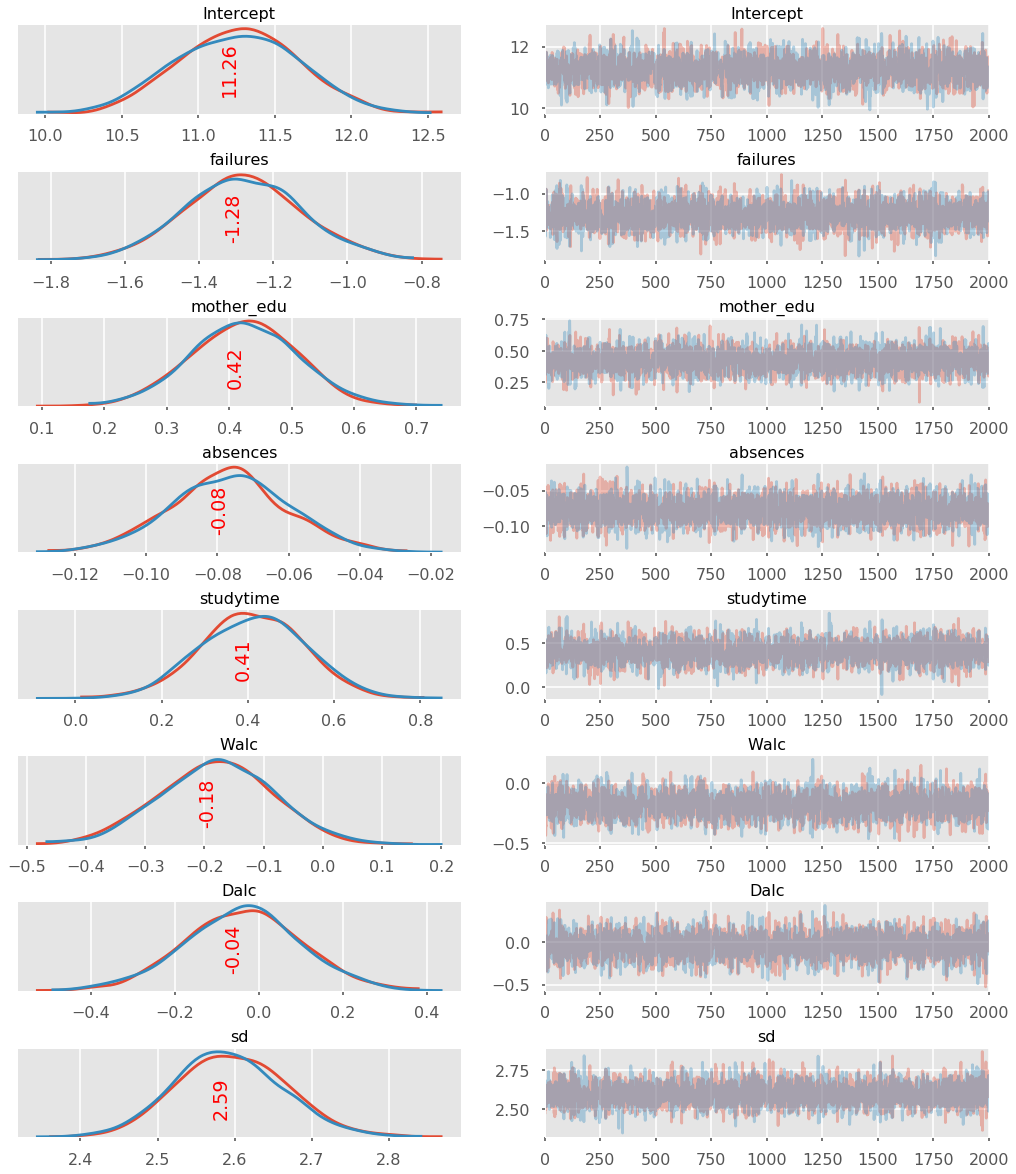

In [65]:
plot_trace(normal_trace)
plt.savefig('Bayesian2.png');

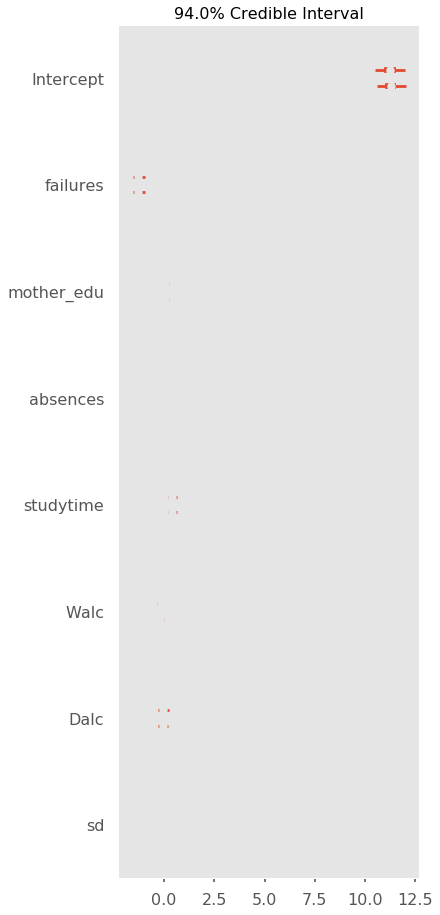

In [77]:
pm.forestplot(normal_trace);

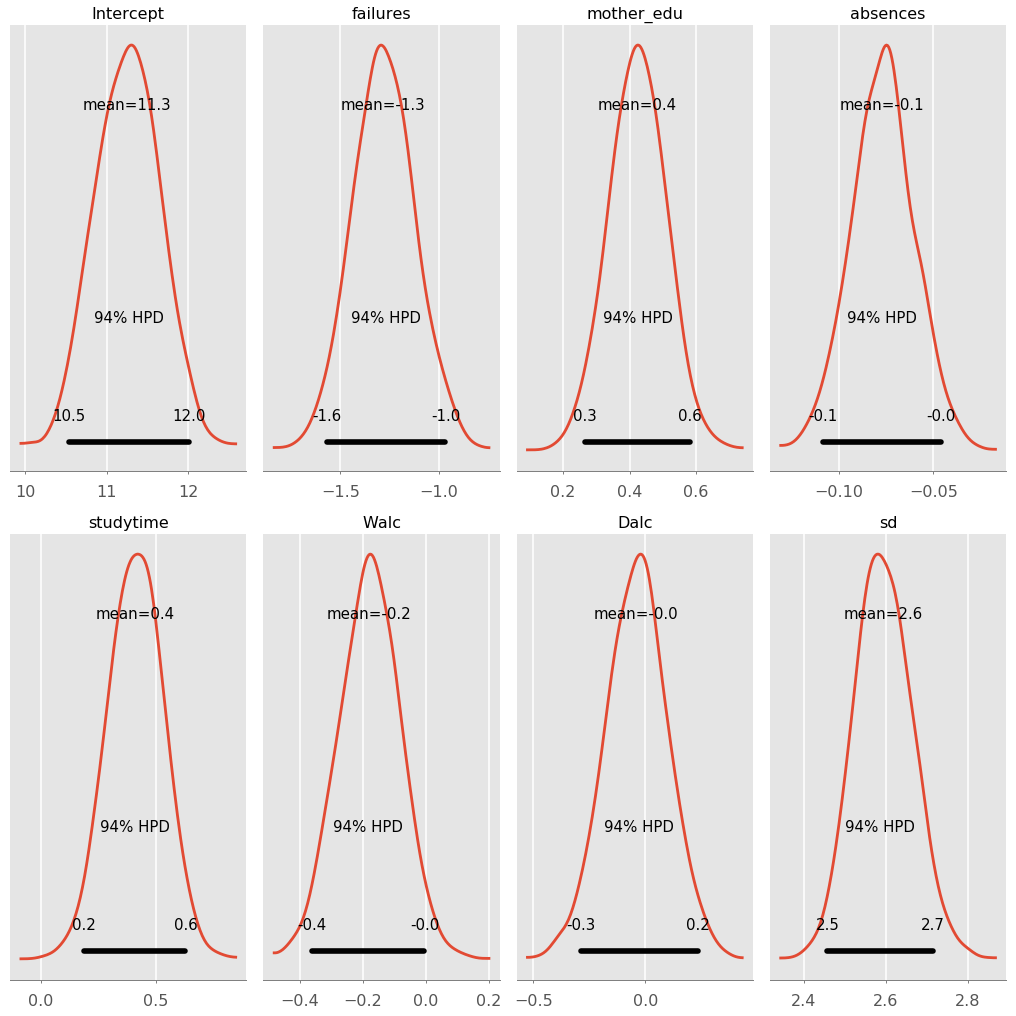

In [66]:
pm.plot_posterior(normal_trace, figsize = (14, 14), text_size=20)
plt.savefig('Baysian4.png');

In [67]:
# Print out the mean variable weight from the trace
for variable in normal_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, 
                                                                np.mean(normal_trace[variable])))

Variable: Intercept       Mean weight in model: 11.2560
Variable: failures        Mean weight in model: -1.2832
Variable: mother_edu      Mean weight in model: 0.4230
Variable: absences        Mean weight in model: -0.0769
Variable: studytime       Mean weight in model: 0.4093
Variable: Walc            Mean weight in model: -0.1803
Variable: Dalc            Mean weight in model: -0.0401
Variable: sd_log__        Mean weight in model: 0.9527
Variable: sd              Mean weight in model: 2.5937


In [68]:
pm.summary(normal_trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,11.256007,0.399126,0.007434,10.501014,12.023211,2441.701563,1.000783
failures,-1.283244,0.157727,0.002420,-1.589308,-0.968371,4196.012929,0.999778
mother_edu,0.422991,0.085151,0.001334,0.251630,0.583667,3342.670177,0.999988
absences,-0.076852,0.016494,0.000242,-0.110122,-0.044653,4388.167183,1.000322
studytime,0.409338,0.119922,0.002072,0.185644,0.651239,2961.642850,0.999940
Walc,-0.180274,0.095850,0.001746,-0.362547,0.008474,2535.480396,1.000614
Dalc,-0.040077,0.137874,0.002431,-0.305502,0.238985,2943.690765,0.999861
sd,2.593739,0.069855,0.001132,2.460184,2.728843,4042.671359,1.002179


In [69]:
model_formula = 'Grade = '
for variable in normal_trace.varnames:
    model_formula += ' %0.2f * %s +' % (np.mean(normal_trace[variable]), variable)

' '.join(model_formula.split(' ')[:-1])

'Grade =  11.26 * Intercept + -1.28 * failures + 0.42 * mother_edu + -0.08 * absences + 0.41 * studytime + -0.18 * Walc + -0.04 * Dalc + 0.95 * sd_log__ + 2.59 * sd'

In [70]:
# Evalute the MCMC trace and compare to ml models
def evaluate_trace(trace, X_train, X_test, y_train, y_test, model_results):
    
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Means for all the weights
    var_means = var_weights.mean(axis=0)
    
    # Create an intercept column
    X_test['Intercept'] = 1
    
    # Align names of the test observations and means
    names = X_test.columns[1:]
    X_test = X_test.ix[:, names]
    var_means = var_means[names]
    
    # Calculate estimate for each test observation using the average weights
    results = pd.DataFrame(index = X_test.index, columns = ['estimate'])

    for row in X_test.iterrows():
        results.ix[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))
        
    # Metrics 
    actual = np.array(y_test)
    errors = results['estimate'] - actual
    mae = np.mean(abs(errors))
    rmse = np.sqrt(np.mean(errors ** 2))
    
    print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))
    
    # Add the results to the comparison dataframe
    model_results.ix['Bayesian LR', :] = [mae, rmse]
    
    plt.figure(figsize=(12, 8))
    
    # Plot median absolute percentage error of all models
    ax = plt.subplot(1, 2, 1)
    model_results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'r', ax = ax)
    plt.title('Model Mean Absolute Error Comparison'); plt.ylabel('MAE'); 
    plt.tight_layout()
    
    # Plot root mean squared error of all models
    ax = plt.subplot(1, 2, 2)
    model_results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'b', ax = ax)
    plt.title('Model RMSE Comparison'); plt.ylabel('RMSE')
    
    return model_results

Model  MAE: 2.1659
Model RMSE: 2.6705


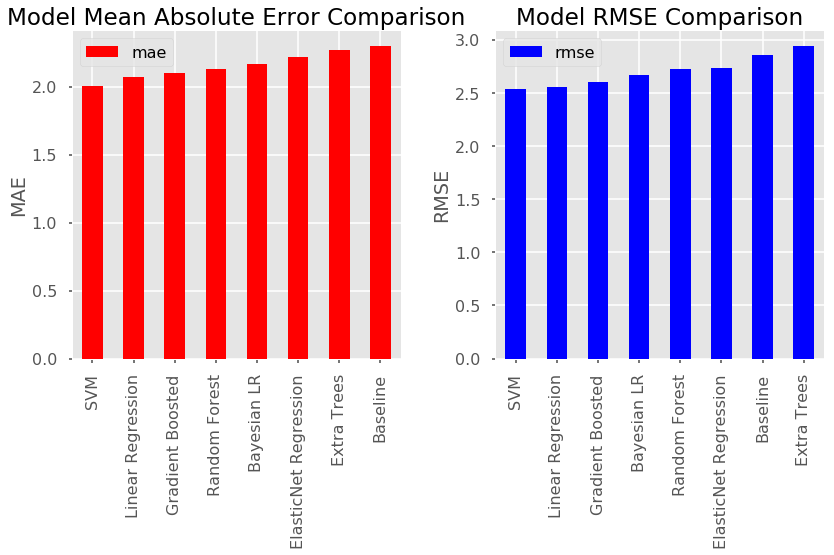

In [71]:
all_model_results = evaluate_trace(normal_trace, X_train, X_test, y_train, y_test, results)

In [84]:
all_model_results

,mae,rmse
Linear Regression,2.07296,2.55469
ElasticNet Regression,2.21774,2.72956
Random Forest,2.12625,2.72638
Extra Trees,2.27197,2.94031
SVM,2.0031,2.54028
Gradient Boosted,2.10341,2.59888
Baseline,2.29839,2.85539
Bayesian LR,2.1659,2.67048


In [85]:
#develop a baseline neural network

import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'